## Задания 1 недели

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки. 

In [1]:
import pandas as pd

In [17]:
from statsmodels.stats.weightstats import _tconfint_generic

In [13]:
data = pd.read_csv('c4_w1_tren_test_water.txt', sep="\t",  header=0)
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [14]:
data.shape

(61, 4)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
location     61 non-null object
town         61 non-null object
mortality    61 non-null int64
hardness     61 non-null int64
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [16]:
data.columns

Index(['location', 'town', 'mortality', 'hardness'], dtype='object')

Используем выборочные дисперсии, и построим доверительные интервалы вида
$$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [37]:
# Посчитаем среднее и стандартное отклонение
mean_mort = data.mortality.mean()
std_mort = data.mortality.std(ddof=1)/(len(data))**0.5
std_mort

24.028521714278174

In [39]:
# Посчитаем 95% процентный доверительный интервал
print("95%% confidence interval", _tconfint_generic(mean_mort, std_mort, len(data) - 1, 0.05, 'two-sided'))

95%% confidence interval (1476.0833413552848, 1572.2117406119285)


На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [46]:
# Посчитаем среднее и стандартное отклонение
mean_mort_south = data[data['location'] == 'South'].mortality.mean()
std_mort_south = data[data['location'] == 'South'].mortality.std(ddof=1)/(len(data[data.location == 'South']))**0.5
std_mort_south

27.509048538240833

In [47]:
# Посчитаем 95% процентный доверительный интервал
print("95%% confidence interval", _tconfint_generic(mean_mort_south, std_mort_south, 
                                                    len(data[data.location == 'South']) - 1, 0.05, 'two-sided'))

95%% confidence interval (1320.1517462936238, 1433.463638321761)


На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод? 

In [48]:
# Посчитаем среднее и стандартное отклонение
mean_mort_north = data[data['location'] == 'North'].mortality.mean()
std_mort_north = data[data['location'] == 'North'].mortality.std(ddof=1)/(len(data[data.location == 'North']))**0.5
std_mort_north

23.146562624816188

In [49]:
# Посчитаем 95% процентный доверительный интервал
print("95%% confidence interval", _tconfint_generic(mean_mort_north, std_mort_north, 
                                                    len(data[data.location == 'North']) - 1, 0.05, 'two-sided'))

95%% confidence interval (1586.5605251961385, 1680.6394748038613)


Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

In [50]:
# Посчитаем среднее и стандартное отклонение для воды для севера и юга
mean_hard_south = data[data['location'] == 'South'].hardness.mean()
std_hard_south = data[data['location'] == 'South'].hardness.std(ddof=1)/(len(data[data.location == 'South']))**0.5
mean_hard_north = data[data['location'] == 'North'].hardness.mean()
std_hard_north = data[data['location'] == 'North'].hardness.std(ddof=1)/(len(data[data.location == 'North']))**0.5

In [51]:
# Посчитаем 95% процентные доверительные интервалы
print("95%% confidence interval for South", _tconfint_generic(mean_hard_south, std_hard_south, 
                                                    len(data[data.location == 'South']) - 1, 0.05, 'two-sided'))
print("95%% confidence interval for North", _tconfint_generic(mean_hard_north, std_hard_north, 
                                                    len(data[data.location == 'North']) - 1, 0.05, 'two-sided'))

95%% confidence interval for South (53.467198692036106, 86.07126284642544)
95%% confidence interval for North (21.42248728572426, 39.37751271427574)


При $\sigma$=1 какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью $\pm$ 0.1?

In [52]:
(1.95996/0.1)**2

384.14432015999995

In [56]:
1.95996/(385)**0.5

0.09988881093300886

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [57]:
n = 50
gen = 1


In [58]:
from statsmodels.stats.proportion import proportion_confint

In [59]:
normal_interval = proportion_confint(gen, n, method = 'normal', alpha = 0.05)

In [60]:
normal_interval

(0.0, 0.05880530708179099)

In [61]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.000000, 0.058805] with width 0.058805


__комментарий:__
По какой-то необъяснимой причине левая граница интервала обнулена. Посчитаем вручную

In [69]:
right_side = normal_interval[1]
center = gen/n
left_side = gen/n - (right_side - gen/n)
left_side

-0.018805307081790987

В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [62]:
wilson_interval = proportion_confint(gen, n, method = 'wilson',  alpha = 0.05)
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.003539, 0.104954] with width 0.101415


Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?

In [63]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [64]:
n_samples = samplesize_confint_proportion(gen/n, 0.01, alpha = 0.05)
n_samples

752.9259288560489

In [65]:
import numpy as np
n_samples = int(np.ceil(n_samples))
n_samples

753

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%, от неизвестного параметра $p$. Посмотрите, при каком значении $p$ нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком $p$, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?

In [66]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


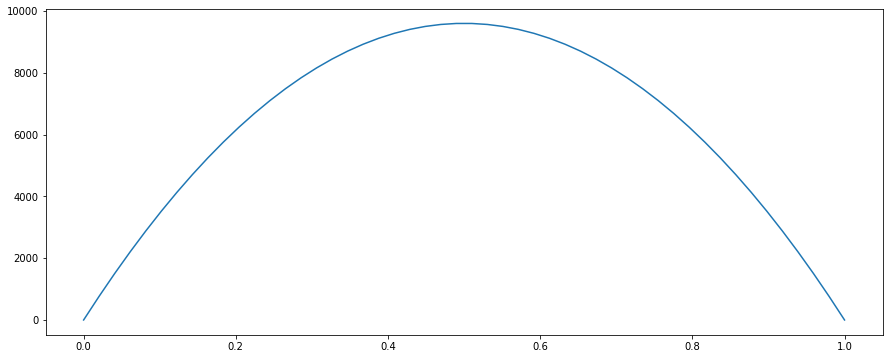

In [67]:
p = np.linspace(0, 1, num=50, endpoint=True)

figure(figsize(15, 6))
plot(p, samplesize_confint_proportion(p, 0.01, alpha = 0.05))
scatter()

In [78]:
from scipy.optimize import minimize

def f(p):
    return -samplesize_confint_proportion(p, 0.01, alpha = 0.05)

res = minimize(f, 0)
res

      fun: -9603.647051735317
 hess_inv: array([[8.55727922e-06]])
      jac: array([0.00048828])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 16
      nit: 2
     njev: 5
   status: 2
  success: False
        x: array([0.5])

In [79]:
# Или можно так (если знаешь точку максимума для вероятности доли)
from math import ceil
ceil(samplesize_confint_proportion(0.5, 0.01, method='normal'))

9604

Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины $X\sim N\left(\mu,\sigma^2\right)$ лежит в интервале $\mu\pm c \cdot \sigma$. Чему равно точное значение константы $c$? Округлите ответ до четырёх знаков после десятичной точки. 

In [86]:
from scipy.stats import norm

# Правило 2-х сигм уточняется следующим образом. 
# Нужно взять Percent Point Function из scipy.stats.norm и посчитать для 0.975 (1-альфа/2)
# Или для 0.025, но со знаком минус. Округляем вверх и получаем 2 сигмы.

norm.ppf(0.975)

1.959963984540054

In [90]:
# Соответвественно правило трех сигм уточняется следующим образом
alpha = 0.003
z = 1 - alpha / 2
norm.ppf(z)

2.9677379253417944

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо. 

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [91]:
p_asp = 104/11037
p_plac = 189/11034
p_plac - p_asp

0.0077060239760047815

Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки. 

$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

In [93]:
alpha = 0.05
z = norm.ppf(1 - alpha / 2)
left_boundary = (p_plac - p_asp) - z * np.sqrt(p_plac * (1 - p_plac)/ 11034 + p_asp * (1 - p_asp)/ 11037)
right_boundary = (p_plac - p_asp) + z * np.sqrt(p_plac * (1 - p_plac)/ 11034 + p_asp * (1 - p_asp)/ 11037)
                                               
print(left_boundary, right_boundary)

0.004687750675049439 0.010724297276960124


Продолжим анализировать данные эксперимента Гарвардской медицинской школы. 

Для бернуллиевских случайных величин $X\sim Ber(p)$ часто вычисляют величину $\frac{p}{1-p}$, которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо $p$ нужно подставить $\hat{p}$. Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как 

$\frac{\frac{189}{11034}}{1-\frac{189}{11034}} = \frac{189}{11034-189}\approx 0.0174$ 

Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [95]:
def odds(infarct, samples):
    p = infarct / samples
    return p / (1-p)

plac_oods = odds(189, 11034)
asp_oods = odds(104, 11037)

plac_oods / asp_oods

1.8320539419087138

Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
установите random seed=0;
сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

In [103]:
# функции из урока
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [111]:
asp_sample = np.array([1]*104 + [0]*(11037-104))
plac_sample = np.array([1]*189 + [0]*(11034-189))

In [115]:
np.random.seed(0)
asp_median_scores = np.array(map(np.median, get_bootstrap_samples(asp_sample, 1000)))
plac_median_scores = list(map(np.median, get_bootstrap_samples(plac_sample, 1000)))

In [118]:
np.random.seed(0)
asp_bootstrap_samples = get_bootstrap_samples(asp_sample, 1000)
plac_bootstrap_samples = get_bootstrap_samples(plac_sample, 1000)

In [131]:
asp_chanses = np.array(list(map(lambda x: odds(sum(x), len(x)), asp_bootstrap_samples)))
plac_chanses = np.array(list(map(lambda x: odds(sum(x), len(x)), plac_bootstrap_samples)))

In [133]:
odds_ratio = plac_chanses / asp_chanses

In [135]:
print("95% интервал для отношения шансов:",  stat_intervals(odds_ratio, 0.05))

95% интервал для отношения шансов: [1.44419465 2.34321168]


По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса. 

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [140]:
# выборка Xn: 75% испытывают стресс
# H0: уровень стресса работников ресторана не отличается от средних показателей.
# статистика: 67 из 100 истывают стресс (1 - испытывают, 0 - не испытывают)
# H1: уровень стресса работников ресторана отличается от средних показателей (Т.е. в любую сторону, а значит two-sided)

from scipy import stats

stats.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.08222258891386608

Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

In [143]:
stats.binom_test(22, 50, 0.75, alternative = 'two-sided')

3.4831478978300243e-06

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [146]:
data = pd.read_csv('pines.txt', header = 0, sep = '\t')
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 2 columns):
sn    584 non-null float64
we    584 non-null float64
dtypes: float64(2)
memory usage: 9.2 KB


In [149]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Svetlana\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ceil', 'f', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


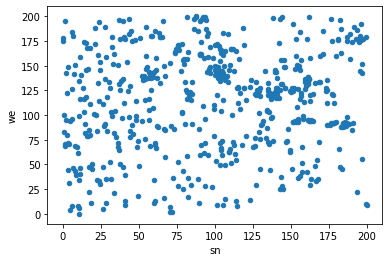

In [158]:
# Посмотрим, как группируются деревья. 
data.plot.scatter('sn', 'we')

In [159]:
# Посчитаем количество деревьев в каждом секторе
from scipy.stats import binned_statistic_2d

trees_count = stats.binned_statistic_2d(data.sn, data.we, None, 'count', bins=[5, 5])
trees_count.statistic

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [165]:
trees_count.statistic.shape

(5, 5)

<BarContainer object of 25 artists>

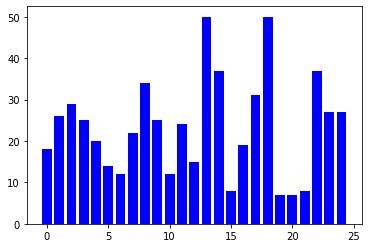

In [166]:
# Посмотрим на гистограмму
pylab.bar(range(25), np.ravel(trees_count.statistic), color = 'b')

__Визуально ни по scatter-plot, ни по гистограмме не видно, чтобы сосны росли равномерно__

In [167]:
# Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? 
# В правильном ответе два знака после десятичной точки.

# По-моему как раз сосны растут неравномерно. 
# А для того, чтобы среднее посчитать надо просто разделить количество сосен на количество квадратов.
# Не ясно, зачем было строить все эти графики.
len(data) / 25

23.36

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [170]:
# Ага)) значит, не зря считали статистику по квадратам))
from scipy.stats import chisquare

mean_count_trees = [len(data) / 25 for i in range(25)]
real_count_trees = np.ravel(trees_count.statistic)

chisquare(real_count_trees, mean_count_trees, ddof = 1)

Power_divergenceResult(statistic=150.58904109589042, pvalue=9.87806178820889e-21)

In [172]:
statistic = chisquare(real_count_trees, mean_count_trees, ddof = 1).statistic
statistic

150.58904109589042

In [182]:
chisquare(real_count_trees, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно? 

Нулевое распределение статистики — хи-квадрат с $25-1=24$ степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы $K-1$, где $K$ — количество интервалов).

Посчитайте достигаемый уровень значимости.  

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare  — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

In [189]:
from scipy.stats import chi2

rv = chi2.cdf(real_count_trees, df = 24)

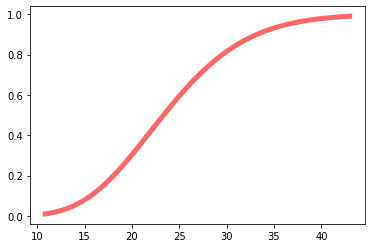

In [179]:
df = 24
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)
plot(x, chi2.cdf(x, df),
       'r-', lw=5, alpha=0.6)